In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import bempp.api
from bempp.api import shapes
import bempp_cavity

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/lib/python3/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Define Mesh

In [3]:
ELEMENT_SIZE = 0.5
LENGTH_CAVITY = 1
LENGTH_WALL = 3

In [4]:
inner_walls = [
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(-1.25, -1/2, -1.25)
    ),
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(0.25, -1/2, -1.25)
    ),
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(-1.25, -1/2, 0.25)
    ),
    shapes.cube(
        length=1, h=ELEMENT_SIZE,
        origin=(0.25, -1/2, 0.25)
    ),
    
]
outer_wall = shapes.cube(
        length=LENGTH_WALL, h=ELEMENT_SIZE,
        origin=(-LENGTH_WALL/2, -LENGTH_WALL/2, -LENGTH_WALL/2)
)
grid = bempp_cavity.create_grid(outer_wall, *inner_walls)

# Define Parameters and incident wave

In [5]:
Ks = [1, 1, 1, 1, 1, 1]
MUs = [1, 1, 1, 1, 1, 1]
wave = bempp_cavity.IncidentWave(Ks[0], MUs[0])

1 1


# Create Models

In [6]:
model_sf = bempp_cavity.Model(grid, Ks, MUs, wave)

In [7]:
sol_sf = model_sf.solve()

In [8]:
# model_wf = bempp_cavity.Model(grid, Ks, MUs, wave, spaces='RWG-dominant')

# Solve Them

In [9]:
# methods = [
#     'none', 
#     'diagonal',
#     'self',
# ]

In [10]:
# sol_sf = {
#     method: model_sf.solve(preconditioner=method)
#     for method in methods
# }

In [11]:
# sol_wf = {
#     method: model_wf.solve(preconditioner=method)
#     for method in methods
# }

# Analyse Results

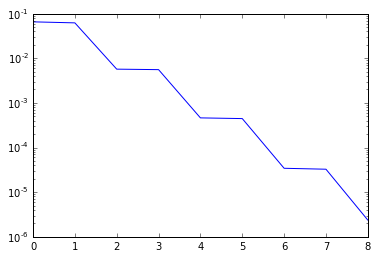

In [12]:
plt.semilogy(sol_sf.residuals)

## Convergence

In [13]:
# for method in methods:
#     plt.semilogy(sol_sf[method].residuals, label=method)
# plt.legend()
# plt.show();

In [14]:
# for method in methods:
#     plt.semilogy(sol_wf[method].residuals, label=method)
# plt.legend()
# plt.gcf().savefig('residuals.png')
# plt.show();

## Runtime

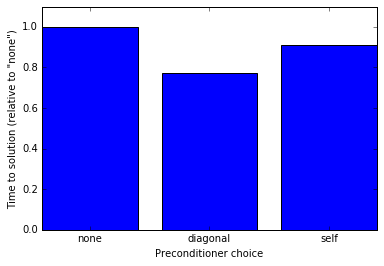

In [12]:
#
# Plot bar chart of run times
#
ref = sol_wf['none'].info['time_solve']
x = [i for i, _ in enumerate(methods)]
times = [sol_wf[method].info['time_solve']/ref for method in methods]
xlabels = methods

fig, ax = plt.subplots(1, 1)
plt.setp(ax, xticks=x, xticklabels=xlabels)


ax.bar(x, times, align='center');
ax.set_ylim([0, 1.1])
ax.set_xlabel('Preconditioner choice')
ax.set_ylabel('Time to solution (relative to "none")')
pass

In [13]:
# Average time per matvec
for m in methods:
    print(m, sol_wf[m].info['time_solve']/sol_wf[m].info['matvec_count'])

none 0.009805356439960139
diagonal 0.009942656311475407
self 0.009801596970942981


# Memory Requirement

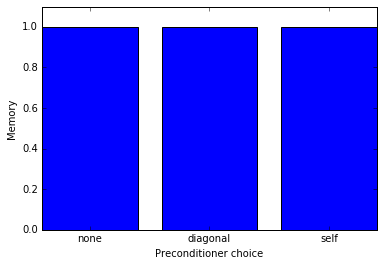

In [15]:
#
# Plot bar chart of run times
#
ref = sol_wf['none'].get_total_memory_size()
x = [i for i, _ in enumerate(methods)]
times = [sol_wf[method].get_total_memory_size()/ref for method in methods]
xlabels = methods

fig, ax = plt.subplots(1, 1)
plt.setp(ax, xticks=x, xticklabels=xlabels)


ax.bar(x, times, align='center');
ax.set_ylim([0, 1.1])
ax.set_xlabel('Preconditioner choice')
ax.set_ylabel('Memory')
pass

# Sanity Check

1 1 1 1
[2916, 9184, 36300]
cavity
wall
exterior


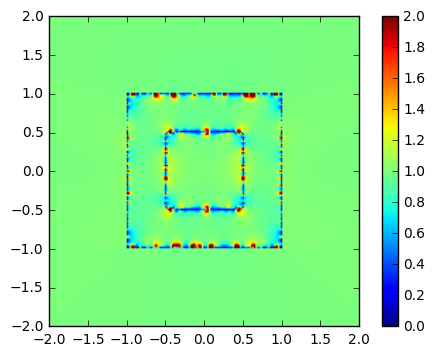

In [33]:
sol_sf.plot()

In [40]:
a = {0: 0, 1:1}
0 in a

True

In [21]:
outer_wall.bounding_box

array([[-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5]])

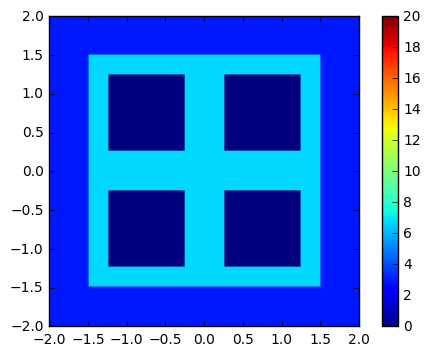

In [15]:
sol_sf.show_domains()

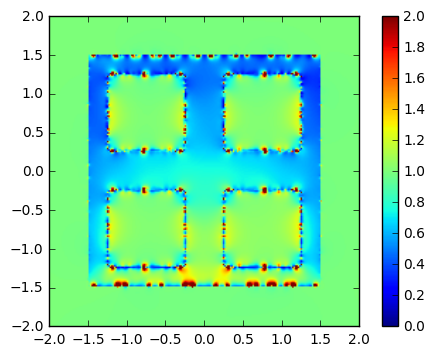

In [16]:
sol_sf.plot()